# K means clustering on Options Data

In [467]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
from IPython.display import display

%matplotlib inline

__Intro__

In this notebook we will conduct our own analysis on options data by using the kmeans classifier algorithim

__Overview__







Load in the data 

In [468]:
from glob import glob 
stocks = [str(x).split('/')[1] for x in glob('data/*')]
from get_n_data import get_n_data, add_stock_price, load_sp, get_price_data
sp = get_price_data(stocks, download= False)
sp.head()

Metric      Adj Close                                                 \
Stock_name        AAL        AAPL        ABBV        ABNB       AFRM   
Date                                                                   
2021-09-01  19.639999  151.870819  108.860748  156.589996  96.480003   
2021-09-02  19.760000  153.006042  108.618347  157.199997  98.989998   
2021-09-03  19.370001  153.653320  108.230499  158.000000  93.050003   
2021-09-07  19.530001  156.033325  105.719139  165.000000  91.510002   
2021-09-08  19.129999  154.459915  107.008751  163.929993  87.540001   

Metric                                                           ...  \
Stock_name        AMC         AMD         AMZN  ARDX       ASAN  ...   
Date                                                             ...   
2021-09-01  43.689999  109.989998  3479.000000  1.45  77.279999  ...   
2021-09-02  44.380001  109.199997  3463.120117  1.45  89.160004  ...   
2021-09-03  44.020000  109.919998  3478.050049  1.44  93.849998  ...   
2021-09-07  47.830002  109.150002  3509.290039  1.40  94.529999  ...   
2021-09-08  47.400002  106.169998  3525.500000  1.36  92.089996  ...   

Metric         Volume                                                          \
Stock_name       VUZI         VXX        WBA      WEAT         WFC        WMT   
Date                                                                            
2021-09-01  1241100.0  19214400.0  5212400.0  152000.0  84960500.0  6352200.0   
2021-09-02  1297300.0  24455800.0  6021100.0  127900.0  37629000.0  6672700.0   
2021-09-03   970900.0  27318900.0  3338000.0  122000.0  21687500.0  5737300.0   
2021-09-07  1054100.0  23409000.0  3355100.0  232200.0  19733500.0  8448400.0   
2021-09-08  1318800.0  28293800.0  2823700.0  170800.0  21252400.0  6502800.0   

Metric                                                      
Stock_name         XLE         XLF         XLV         XOM  
Date                                                        
2021-09-01  31729900.0  43976200.0  10571100.0  21644100.0  
2021-09-02  30817700.0  29611500.0   6847800.0  23293300.0  
2021-09-03  19581400.0  34847500.0   5632800.0  13840000.0  
2021-09-07  21236400.0  39214900.0   8739100.0  14354400.0  
2021-09-08  21899200.0  32523900.0   6986200.0  18756700.0  

[5 rows x 708 columns]

In [469]:
print('Option Data')
display(get_n_data('aapl'))
print('======='*28)
print('Price Data:')
display(add_stock_price('qqq').sort_index().head())

Option Data


,stock,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,type,expiry,stk_price,timeValue
gatherDate,,,,,,,,,,,,,,,,,
2022-05-10,aapl,AAPL240621P00320000,2022-05-10,320.00,164.95,164.30,165.75,3.75,2.33,2.0,0.0,0.223763,True,Put,2024-06-21,154.38,3.067460
2022-05-10,aapl,AAPL220617P00117500,2022-05-10,117.50,0.50,0.50,0.51,-0.18,-26.47,56.0,4388.0,0.516606,False,Put,2022-06-17,154.38,0.150794
2022-05-10,aapl,AAPL220617P00118750,2022-05-10,118.75,0.55,0.57,0.58,-0.25,-31.25,372.0,2820.0,0.514165,False,Put,2022-06-17,154.38,0.150794
2022-05-10,aapl,AAPL220617P00120000,2022-05-10,120.00,0.61,0.61,0.62,-0.20,-24.69,833.0,28569.0,0.504888,False,Put,2022-06-17,154.38,0.150794
2022-05-10,aapl,AAPL220617P00121250,2022-05-10,121.25,0.69,0.69,0.70,-0.24,-25.81,473.0,6433.0,0.501714,False,Put,2022-06-17,154.38,0.150794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,aapl,AAPL221118C00155000,2022-05-12,155.00,9.05,9.05,9.30,-2.90,-24.27,107.0,1870.0,0.369605,False,Call,2022-11-18,139.96,0.753968
2022-05-12,aapl,AAPL221118C00160000,2022-05-12,160.00,8.05,7.50,7.65,-1.90,-19.10,1627.0,3333.0,0.363379,False,Call,2022-11-18,139.96,0.753968
2022-05-12,aapl,AAPL221118C00165000,2022-05-12,165.00,6.25,6.00,6.20,-1.93,-23.59,274.0,3063.0,0.356757,False,Call,2022-11-18,139.96,0.753968


Price Data:


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-09-01,379.204742,380.579987,382.709991,380.369995,381.040009,28138300.0
2021-09-02,379.025452,380.399994,382.309998,379.149994,381.970001,25453400.0
2021-09-03,380.191193,381.570007,381.980011,379.200012,379.220001,24605400.0
2021-09-07,380.729248,382.109985,382.779999,380.489990,381.679993,23970200.0
2021-09-08,379.404053,380.779999,381.929993,378.450012,381.929993,32949200.0


In [470]:
stock_data = {x:{'Prices':add_stock_price(x), 'Options':get_n_data(x, 5, True, True)} for x in stocks}

In [471]:
stock_data['aapl']['Options'].head()

,stock,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,type,expiry,stk_price,timeValue
gatherDate,,,,,,,,,,,,,,,,,
2022-05-06,aapl,AAPL220506C00100000,2022-05-06,100.0,58.98,56.4,56.55,2.48,4.39,11.0,4.0,4.960941,True,Call,2022-05-06,155.9,0.0
2022-05-06,aapl,AAPL220506P00141000,2022-05-06,141.0,0.01,0.0,0.01,-0.01,-50.00,183.0,1836.0,0.687503,False,Put,2022-05-06,155.9,0.0
2022-05-06,aapl,AAPL220506P00140000,2022-05-06,140.0,0.01,0.0,0.01,0.00,0.00,1382.0,6648.0,0.750003,False,Put,2022-05-06,155.9,0.0
2022-05-06,aapl,AAPL220506P00139000,2022-05-06,139.0,0.01,0.0,0.01,0.00,0.00,47.0,1348.0,0.781252,False,Put,2022-05-06,155.9,0.0
2022-05-06,aapl,AAPL220506P00138000,2022-05-06,138.0,0.01,0.0,0.01,0.00,0.00,100.0,2922.0,0.843752,False,Put,2022-05-06,155.9,0.0


In [472]:
prices = stock_data['dwac']['Prices'].copy()

## Lets calculate the _Buy and hold_ profitability of a list of prices 
Further: given a list of prices, determine the maximum profit attainable if you were to buy when the price is the lowest, and sell when the price is the highest. We can generalize this function by making the input a list, and using the list of prices to determine the best buy and sell dates, as well as calculate the maximum profit. 

In [473]:
def make_money(prices): ## `prices` is a list
    min_price = max(prices) #?
    max_profit = 0 #?
    for i in range(len(prices)):
        if (prices[i] < min_price):
            min_price = min(prices[i],prices[i-1])
        elif prices[i] - min_price > max_profit:
            max_profit = prices[i] - min_price
    return max_profit

max_profits = {}
for stock, item in stock_data.items():
    prices = item['Prices']['Close']
    max_profits[stock] = make_money(list(prices))


In [474]:
max_profits['aapl']

42.86999511718753

## Now we need to gather our classification data

In [475]:
from dataFunctions_2 import bsModel
def max_profit_options(symb):
    
    options =  stock_data[symb]['Options'].sort_index().copy()
    d = {}
    #criteria = (options['volume'] > 100) & (options['ask'] - options['bid'] < .05)  & (options['lastPrice']< 5)
    #conts = options[criteria]['contractSymbol'].unique()
    conts = options['contractSymbol'].unique()
    gb = options.groupby('contractSymbol', as_index=False)
    d = {conts[i]:{'data':bsModel(gb.get_group(conts[i]).reset_index()).set_index('gatherDate'), \
                 'maxProfit': make_money((gb.get_group(conts[i])['lastPrice'] * 100))} \
                     for i in range(len(conts)) }
    print(f'length of contacts: {len(conts)}')
    out = []
    for i in conts:
        prices = (gb.get_group(i)['lastPrice'] * 100)
        out.append((i, make_money(prices)))

    out = sorted(out, key = lambda x: x[1], reverse=True)
    return d, out

d, out = max_profit_options('spy')
print('First 5 keys: ' , list(d.keys())[:5])
print("Columns in dataframe",list(d[out[0][0]]['data'].columns))
d[out[0][0]]['data'].head()

length of contacts: 918
First 5 keys:  ['SPY220511P00490000', 'SPY220506P00457000', 'SPY220506P00456000', 'SPY220506P00455000', 'SPY220506P00454000']
Columns in dataframe ['stock', 'contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask', 'change', 'percentChange', 'volume', 'openInterest', 'impliedVolatility', 'inTheMoney', 'type', 'expiry', 'stk_price', 'timeValue', 'theta', 'delta', 'gamma', 'vega', 'theoPrice', 'strike_stock_dif']


,stock,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,...,type,expiry,stk_price,timeValue,theta,delta,gamma,vega,theoPrice,strike_stock_dif
gatherDate,,,,,,,,,,,,,,,,,,,,,
2022-05-06,spy,SPY220511P00462000,2022-04-21,462.0,14.31,53.66,54.07,0.00,0.00,NaN,...,Put,2022-05-11,407.54,0.019841,-0.0,0.0,0.0,0.0,0.0,-54.46
2022-05-09,spy,SPY220511P00462000,2022-05-09,462.0,59.84,61.58,61.91,45.53,318.17,3.0,...,Put,2022-05-11,399.94,0.007937,-0.0,0.0,0.0,0.0,0.0,-62.06
2022-05-10,spy,SPY220511P00462000,2022-05-10,462.0,58.07,62.71,63.08,-1.77,-2.96,1.0,...,Put,2022-05-11,398.42,0.003968,-0.0,0.0,0.0,0.0,0.0,-63.58
2022-05-11,spy,SPY220511P00462000,2022-05-11,462.0,60.43,66.11,66.50,2.36,4.06,3.0,...,Put,2022-05-11,394.95,0.000000,NaN,0.0,NaN,0.0,0.0,-67.05


Now that we have all of the contracts stored in keys we can now make the determination if the contract is profitable or not. For starters lets take a quick look at the greek variables delta and gamma, that were attributed to each contract on the first day of data that we have stored. 

In [479]:
d, out = max_profit_options('spy')

length of contacts: 918


<AxesSubplot:xlabel='impliedVolatility', ylabel='vega'>

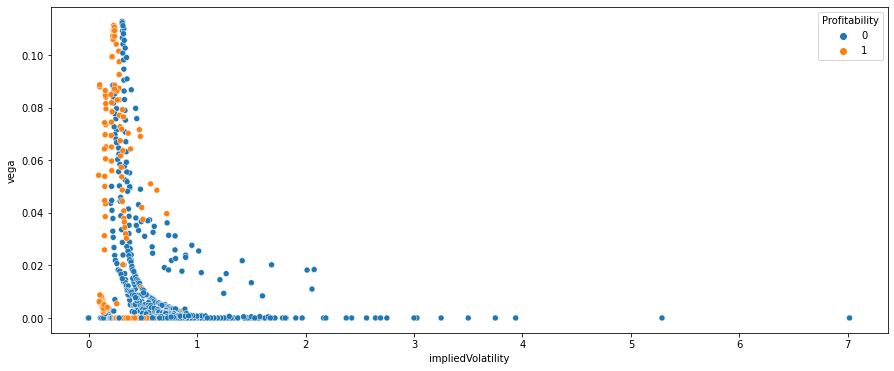

In [480]:
vars = ['impliedVolatility', 'vega']
profitable = pd.DataFrame(columns= ['Symbol', vars[0], vars[1],'Profitability'])
profitable['Symbol'] = list(d.keys())
profitable.set_index('Symbol', inplace = True)
for i in profitable.index:
    profitable.loc[i, vars[0]] = d[i]['data'][vars[0]].mean() 
    profitable.loc[i, vars[1]] = d[i]['data'][vars[1]].mean()
    if d[i]['maxProfit'] > 0:
        profitable.loc[i, 'Profitability']  = 1
    else:
        profitable.loc[i, 'Profitability']  = 0


import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.scatterplot(x = vars[0], y= vars[1], hue = 'Profitability', data = profitable, ax = axes)

> Above each data point represents a contract in the option chain. We should further seperate these points for both calls and puts. 

In [481]:
data = profitable.fillna(0).copy()
display(data.head())
points = data[[vars[0], vars[1]]].values
[type(i) for i in points[0]]

,impliedVolatility,vega,Profitability
Symbol,,,
SPY220511P00490000,0.00001,0.0,0
SPY220506P00457000,0.00001,0.0,0
SPY220506P00456000,0.00001,0.0,0
SPY220506P00455000,0.00001,0.0,0
SPY220506P00454000,0.00001,0.0,0


[numpy.float64, numpy.float64]

Now lets move on to the clustering algorithim. we will generate a function that randomly selects k of the given observations to serve as centers of the K-means classifier.

In [482]:
def init_centers(X, k):
    """
    Randomly samples k observations from X as centers.
    Returns these centers as a (k x d) numpy array.
    """
    samples = np.random.choice(len(X), size = k, replace= False)
    return X[samples, :].astype(float)

centers_initial = init_centers(points, 2)
print(centers_initial)

[[0.22602092 0.1058624 ]
 [1.12500438 0.        ]]


Next let us compute the distance matrix, $S = (s_{ij})$ such that $s_{ij} = d_{ij}^2$ is the _squared_ distance from point $\hat{x}_i$ to center $\mu_j$. 

In [483]:
def compute_d2(X, centers):
    ###
    X = X.astype(float)
    m = len(X)
    k = len(centers)
    
    S = np.empty((m, k))
    
    for i in range(m):
        S[i,:] = np.linalg.norm(X[i,:] - centers, ord= 2, axis = 1)** 2
    
    return S
    ###

S = compute_d2(points, centers_initial)
S

array([[0.06228779, 1.26561234],
       [0.06228779, 1.26561234],
       [0.06228779, 1.26561234],
       ...,
       [0.06228779, 1.26561234],
       [0.06228779, 1.26561234],
       [0.06228779, 1.26561234]])

Next lets use the distances to assign a cluster label for each datapoint.

That is, consider the $m \times k$ squared distance matrix $S$. For each point $i$, if $s_{i,j}$ is the minimum squared distance for point $i$, then the index $j$ is $i$'s cluster label. In other words, your function should return a (column) vector $y$ of length $m$ such that

$$
  y_i = \underset{j \in \{0, \ldots, k-1\}}{\operatorname{argmin}} s_{ij}.
$$


In [484]:
def assign_cluster_labels(S):
    ###
    return np.argmin(S, axis = 1)
    ###
y_test = assign_cluster_labels(S)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Given a clustering (i.e., a set of points and assignment of labels), compute the center of each cluster.

In [485]:
def update_centers(X, y):
    # X[:m, :d] == m points, each of dimension d
    # y[:m] == cluster labels
    m, d = X.shape
    k = max(y) + 1
    assert m == len(y)
    assert (min(y) >= 0)
    
    centers = np.empty((k, d))
    for j in range(k):
        # Compute the new center of cluster j,
        # i.e., centers[j, :d].
        ###
        centers[j, :] = np.mean(X[y == j, :], axis = 0)
        ###
    return centers

new_centers = update_centers(points, y_test)
new_centers

array([[0.31291499, 0.02012352],
       [1.14805534, 0.00262207]])

Now we will return the within cluster sum of squares. 

In [486]:
def WCSS(S):
    ###
    return np.sum(np.amin(S, axis = 1))
    ###
WCSS_test = WCSS(S)
WCSS_test

163.6316282898811

Lastly lets see if the centers have moved from the initial calculation, we can also sumarize Lloyds K means algorithim

In [489]:
def has_converged(old_centers, centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])

def kmeans(X, k, starting_centers=None, max_steps=np.inf):
    if starting_centers is None:
        centers = init_centers(X, k)
    else:
        centers = starting_centers
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_centers = centers
        ###
        S = compute_d2(X, old_centers)
        labels = assign_cluster_labels(S)
        centers = update_centers(X, labels)
        converged = has_converged(old_centers, centers)
        
        ###
        print ("iteration", i, "WCSS = ", WCSS (S))
        i += 1
    return labels

clustering = kmeans(points, 2, starting_centers=None)

iteration 1 WCSS =  195.3952346129943
iteration 2 WCSS =  155.13121938832856
iteration 3 WCSS =  151.56940264978806
iteration 4 WCSS =  149.05691764987682
iteration 5 WCSS =  146.605258210116
iteration 6 WCSS =  144.69278734298547
iteration 7 WCSS =  143.46412996152978
iteration 8 WCSS =  141.99862892320613
iteration 9 WCSS =  141.4605495027079
iteration 10 WCSS =  141.19918634932543
iteration 11 WCSS =  141.04904487481505
iteration 12 WCSS =  141.0450138572438


Text(0.5, 1.0, 'Observed')

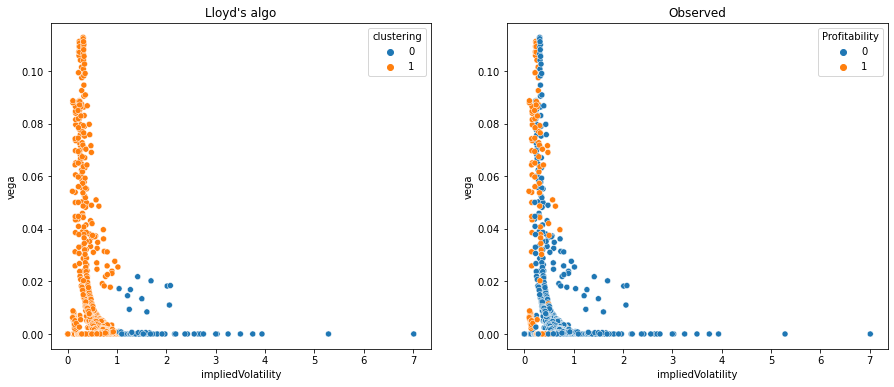

In [503]:
data['clustering'] = clustering
centers = update_centers(points, clustering)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = vars[0], y= vars[1], hue = 'clustering', data = data, ax = axes[0]).set_title('Lloyd\'s algo')
sns.scatterplot(x = vars[0], y= vars[1], hue = 'Profitability', data = profitable, ax = axes[1]).set_title('Observed')

> It seems that `impliedVolatility` & `vega` seem to provide a solid cassifier for this data

In [492]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Profitability'],data['clustering']))
print(classification_report(data['Profitability'],data['clustering']))

[[107 663]
 [  0 148]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.24       770
           1       0.18      1.00      0.31       148

    accuracy                           0.28       918
   macro avg       0.59      0.57      0.28       918
weighted avg       0.87      0.28      0.25       918



In [494]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(points)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Profitability'],kmeans.labels_))
print(classification_report(data['Profitability'],kmeans.labels_))

[[663 107]
 [148   0]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       770
           1       0.00      0.00      0.00       148

    accuracy                           0.72       918
   macro avg       0.41      0.43      0.42       918
weighted avg       0.69      0.72      0.70       918



Text(0.5, 1.0, 'SkLearn')

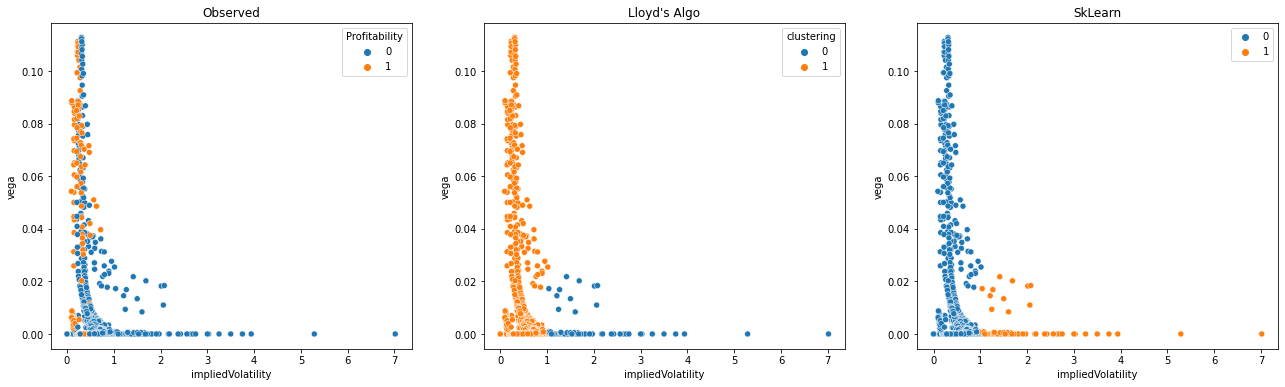

In [501]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
sns.scatterplot(x = vars[0], y= vars[1], hue = 'Profitability', data = profitable, ax = axes[0]).set_title('Observed')
sns.scatterplot(x = vars[0], y= vars[1], hue = 'clustering', data = data, ax = axes[1]).set_title("Lloyd's Algo")
sns.scatterplot(x = vars[0], y= vars[1], hue = kmeans.labels_, data = profitable, ax = axes[2]).set_title('SkLearn')

### It might seem the choosing an option contract with a higher vega, and lower implied Volatility will yield a profitable contract!